In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from time import perf_counter
from scipy import stats
import cv2
from ps3_functions import *

In [4]:
def oneDtosignature(dist1D):
    sig = np.empty((dist1D.size, 2), dtype=np.float32)
    for ii in range(len(dist1D)):
        sig[ii] = np.array([dist1D[ii], ii])
    return sig

def twoDtosignature(arr):
    sig = np.empty((arr.size, 3), dtype=np.float32)
    count = 0
    for ii in range(arr.shape[0]):
        for jj in range(arr.shape[1]):
            sig[count] = np.array([arr[ii,jj], ii, jj])
            count += 1
    return sig

In [3]:
np.random.seed(12051991)
uniform_sample = np.random.rand(3000).reshape(3, 1000)*2-1
bins = np.arange(-1, 1, 0.01)
uniform_hist = np.histogram(uniform_sample, bins=bins)
normal_sample = np.random.normal(size=3000).reshape(3, 1000)
normal_hist = np.histogram(normal_sample, bins=bins)


In [4]:

KLD = stats.entropy( normal_hist[0],uniform_hist[0])
print("KLD from normal to uniform {0:0.4f}".format(KLD))
KLD = stats.entropy( uniform_hist[0],normal_hist[0])
print("KLD from normal to uniform {0:0.4f}".format(KLD))

KLD from normal to uniform 0.0995
KLD from normal to uniform 0.1051


In [6]:
t = perf_counter()
normsig = oneDtosignature(normal_hist[0])
unisig = oneDtosignature(uniform_hist[0])
EMD, middle, flow = cv2.EMD(normsig, unisig, cv2.DIST_L2)
print(EMD)
b = perf_counter()
print(t-b)

0.04814443364739418
-0.044449936999999995


In [7]:
t = perf_counter()
print('hello')
b = perf_counter()
print(t-b)

hello
-0.00014127500000005178


In [8]:
MMD = mmd(normal_hist[0], uniform_hist[0], kernel)

In [9]:
MMD

2.241583012250255

In [16]:
for sigma in [1, 1.1, 1.5,1.6, 2,2.5,  5]:
    print("$\sigma=$ {0}".format(sigma))
    np.random.seed(12051991)
    uniform_sample = np.random.rand(3000).reshape(3, 1000)*2-1
    normal_sample = np.random.normal(0, sigma, size=3000).reshape(3, 1000)
    
    bins = np.arange(-1, 1, 0.01)
    uniform_hist = np.histogram(uniform_sample, bins=bins)
    normal_hist = np.histogram(normal_sample, bins=bins)
    
    t1 = perf_counter()
    KLD = stats.entropy( normal_hist[0],uniform_hist[0])
    print("KLD from normal to uniform {0:0.4f}".format(KLD))
    KLD = stats.entropy( uniform_hist[0],normal_hist[0])
    print("KLD from normal to uniform {0:0.4f}".format(KLD))
    t2 = perf_counter()
    print("KLD compute time {0:0.2f} ms".format(1e3*(t2-t1)))
    
    t1 = perf_counter()
    normsig = oneDtosignature(normal_hist[0])
    unisig = oneDtosignature(uniform_hist[0])
    EMD, middle, flow = cv2.EMD(normsig, unisig, cv2.DIST_L2)
    print("EMD {0:0.4f}".format(EMD))
    t2 = perf_counter()
    print("EMD compute time {0:0.2f} ms".format(1e3*(t2-t1)))
    
    t1 = perf_counter()
    MMD = mmd(normal_hist[0], uniform_hist[0], kernel)
    print("MMD {0:0.4f}".format(MMD))
    t2 = perf_counter()
    print("MMD compute time {0:0.2f} ms".format(1e3*(t2-t1)))

$\sigma=$ 1
KLD from normal to uniform 0.0995
KLD from normal to uniform 0.1051
KLD compute time 0.28 ms
EMD 0.0481
EMD compute time 47.76 ms
MMD 2.2416
MMD compute time 0.99 ms
$\sigma=$ 1.1
KLD from normal to uniform 0.1000
KLD from normal to uniform 0.0992
KLD compute time 0.15 ms
EMD 0.0328
EMD compute time 40.82 ms
MMD 2.1821
MMD compute time 0.24 ms
$\sigma=$ 1.5
KLD from normal to uniform 0.1064
KLD from normal to uniform 0.1129
KLD compute time 0.11 ms
EMD 0.0070
EMD compute time 28.60 ms
MMD 2.0816
MMD compute time 0.32 ms
$\sigma=$ 1.6
KLD from normal to uniform 0.1170
KLD from normal to uniform inf
KLD compute time 0.13 ms
EMD 0.0077
EMD compute time 27.45 ms
MMD 2.0703
MMD compute time 0.28 ms
$\sigma=$ 2
KLD from normal to uniform 0.1013
KLD from normal to uniform inf
KLD compute time 0.10 ms
EMD 0.0000
EMD compute time 25.67 ms
MMD 2.0298
MMD compute time 0.22 ms
$\sigma=$ 2.5
KLD from normal to uniform 0.1319
KLD from normal to uniform inf
KLD compute time 0.10 ms
EMD 0.

In [21]:
for sigma in [1, 1.1, 1.5,1.6, 2,2.5,  5]:
    #print("$\sigma=$ {0}".format(sigma))
    np.random.seed(12051991)
    uniform_sample = np.random.rand(3000).reshape(3, 1000)*2-1
    normal_sample = np.random.normal(0, sigma, size=3000).reshape(3, 1000)
    
    bins = np.arange(-1, 1, 0.01)
    uniform_hist = np.histogram(uniform_sample, bins=bins)
    normal_hist = np.histogram(normal_sample, bins=bins)
    
    t1 = perf_counter()
    KLD1 = stats.entropy( normal_hist[0],uniform_hist[0])
    KLD2 = stats.entropy( uniform_hist[0],normal_hist[0])
    t2 = perf_counter()
    kldtime = 1e3*(t2-t1)
    
    t1 = perf_counter()
    normsig = oneDtosignature(normal_hist[0])
    unisig = oneDtosignature(uniform_hist[0])
    EMD, middle, flow = cv2.EMD(normsig, unisig, cv2.DIST_L2)
    t2 = perf_counter()
    emdtime = 1e3*(t2-t1)
    
    t1 = perf_counter()
    MMD = mmd(normal_hist[0], uniform_hist[0], kernel)
    t2 = perf_counter()
    mmdtime = 1e3*(t2-t1)
    
    print("{0:0.1f} & {1:0.3f} & {2:0.3f} &{3:0.3f} &{4:0.3f} & {5:0.3f} &{6:0.3f} &{7:0.3f} \\\\".format(sigma,
                                                                                                        KLD1, KLD2, EMD, MMD,
                                                                                                       kldtime, emdtime, mmdtime))
    
    
    

1.0 & 0.100 & 0.105 &0.048 &2.242 & 0.149 &52.847 &0.362 \\
1.1 & 0.100 & 0.099 &0.033 &2.182 & 0.093 &41.968 &0.221 \\
1.5 & 0.106 & 0.113 &0.007 &2.082 & 0.070 &31.117 &0.333 \\
1.6 & 0.117 & inf &0.008 &2.070 & 0.068 &30.153 &0.205 \\
2.0 & 0.101 & inf &0.000 &2.030 & 0.104 &25.821 &0.203 \\
2.5 & 0.132 & inf &0.000 &2.018 & 0.067 &25.573 &0.207 \\
5.0 & 0.236 & inf &0.000 &2.000 & 0.069 &17.676 &0.220 \\


### 5.2

In [6]:
import torch
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import scprep

batch_size = 1000
train_data = datasets.MNIST(
    root='../data',
    train=True,
    download=True,
    transform=transforms.ToTensor())

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)


In [7]:
for ii, (data, targets) in enumerate(train_loader):
    if ii>1:
        break
    elif ii==0:
        first_dataset = data.detach().numpy()
    elif ii==1:
        second_dataset = data.detach().numpy()

In [8]:
first_dataset = first_dataset.reshape(1000, 784)
second_dataset = second_dataset.reshape(1000, 784)

In [9]:
first_pca = scprep.reduce.pca(first_dataset, 8)
second_pca = scprep.reduce.pca(second_dataset, 8)

In [32]:
second_pca.shape

(1000, 8)

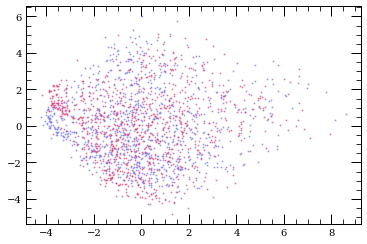

In [40]:
plt.scatter(first_pca[:,0], first_pca[:,1], alpha=0.5, s=1)
plt.scatter(second_pca[:,0], second_pca[:,1], alpha=0.5, s=1)

In [10]:
hist1 = np.histogram2d(first_pca[:,0], first_pca[:,1], bins=[np.linspace(-6, 6, num=20),np.linspace(-6, 10, num=20)])
hist2 = np.histogram2d(second_pca[:, 0], first_pca[:, 1],  bins=[np.linspace(-6, 6, num=20),np.linspace(-6, 10, num=20)])

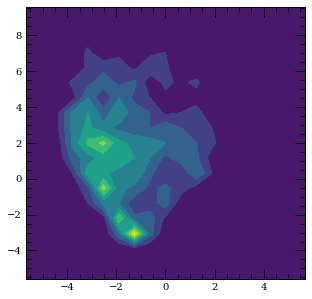

In [102]:
x_centers = [np.mean([hist1[1][ii], hist1[1][ii+1]]) for ii in range(len(hist1[1])-1)]
y_centers = [np.mean([hist1[2][ii], hist1[2][ii+1]]) for ii in range(len(hist1[2])-1)]
XX, YY = np.meshgrid(x_centers, y_centers)

fig, axes = plt.subplots(figsize=(5,5))
axes.contourf(XX, YY,hist1[0])

In [5]:
def get_me_my_histograms(dim, first_pca, second_pca):
    binmin = min(min(first_pca[:,dim]), min(second_pca[:,dim]))
    binmax = max(max(first_pca[:,dim]), max(second_pca[:,dim]))
    bins = np.linspace(binmin, binmax, num=10)
    hist1 = np.histogram(first_pca[:, dim], bins=bins)
    x_centers = [np.mean([hist1[1][ii], hist1[1][ii+1]]) for ii in range(len(hist1[1])-1)]
    return hist1[0]

In [11]:
my_histograms1 = np.array([get_me_my_histograms(dim, first_pca, second_pca) for dim in range(first_pca.shape[1])])
my_histograms2 = np.array([get_me_my_histograms(dim, second_pca, first_pca) for dim in range(first_pca.shape[1])])


In [12]:
t1 = perf_counter()
KLD = stats.entropy( my_histograms1.flatten(), my_histograms2.flatten())#, axis=1)
KLD2 = stats.entropy( my_histograms2.flatten(),my_histograms1.flatten())#, axis=1)
t2 = perf_counter()
kldtime = 1e3*(t2-t1)
print(KLD)
print(KLD2)

inf
0.020333947829428246


In [13]:
t1 = perf_counter()
signature1 = twoDtosignature(my_histograms1)
signature2 = twoDtosignature(my_histograms2)
EMD, middle, flow = cv2.EMD(signature1, signature2, cv2.DIST_L2)
t2 = perf_counter()
emdtime = 1e3*(t2-t1)

t1 = perf_counter()
MMD = mmd(my_histograms1.flatten(), my_histograms2.flatten(), kernel)

t2 = perf_counter()
mmdtime = 1e3*(t2-t1)




In [14]:
EMD

0.08666881918907166

In [15]:
MMD

2.912271575819829

In [16]:
kldtime

0.3233540001019719

In [17]:
emdtime

2.521827999771631

In [18]:
mmdtime

0.3672419998110854